<a href="https://colab.research.google.com/github/FabricioAMonteiro/FabricioAMonteiro/blob/main/Recomenda%C3%A7%C3%A3o%20do%20GroupLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 2)

In [ ]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeid', 'titulo', 'genero']
filmes = filmes.set_index('filmeid')
filmes.head()

,titulo,genero
filmeid,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioid', 'filmeid', 'nota', 'momento']
notas.head()

,usuarioid,filmeid,nota,momento
0,1,307,3.5,1.26e+09
1,1,481,3.5,1.26e+09
2,1,1091,1.5,1.26e+09
3,1,1257,4.5,1.26e+09
4,1,1449,4.5,1.26e+09


In [ ]:
notas.describe()

,usuarioid,filmeid,nota,momento
count,207892.00,207892.00,207891.00,2.08e+05
mean,1042.15,18250.87,3.50,1.19e+09
std,601.23,35134.49,1.09,2.15e+08
min,1.00,1.00,0.50,8.28e+08
25%,514.00,1094.00,3.00,9.94e+08
50%,1072.00,2657.00,3.50,1.16e+09
75%,1523.00,6945.25,4.00,1.42e+09
max,2061.00,193861.00,5.00,1.54e+09


In [ ]:
total_de_votos = notas.filmeid.value_counts()
total_de_votos.head()

356     714
296     684
318     683
593     634
2571    600
Name: filmeid, dtype: int64

In [ ]:
filmes.loc[356]

titulo         Forrest Gump (1994)
genero    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [ ]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,genero,total_de_votos
filmeid,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,496.0
2,Jumanji (1995),Adventure|Children|Fantasy,197.0
3,Grumpier Old Men (1995),Comedy|Romance,113.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,26.0
5,Father of the Bride Part II (1995),Comedy,117.0


In [ ]:
filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,genero,total_de_votos
filmeid,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,714.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,684.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,683.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,634.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,600.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,599.0
527,Schindler's List (1993),Drama|War,546.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,541.0
110,Braveheart (1995),Action|Drama|War,525.0


In [ ]:
notas_medias = notas.groupby('filmeid').mean()['nota']
notas_medias

filmeid
1         3.88
2         3.14
3         3.12
4         3.06
5         2.96
          ... 
192527    2.00
192531    2.50
192533    3.00
192579    4.50
193861    3.00
Name: nota, Length: 13136, dtype: float64

In [ ]:
filmes['nota_media'] = notas_medias
filmes.head(10)

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,496.0,3.88
2,Jumanji (1995),Adventure|Children|Fantasy,197.0,3.14
3,Grumpier Old Men (1995),Comedy|Romance,113.0,3.12
4,Waiting to Exhale (1995),Comedy|Drama|Romance,26.0,3.06
5,Father of the Bride Part II (1995),Comedy,117.0,2.96
6,Heat (1995),Action|Crime|Thriller,216.0,3.75
7,Sabrina (1995),Comedy|Romance,115.0,3.08
8,Tom and Huck (1995),Adventure|Children,9.0,3.78
9,Sudden Death (1995),Action,33.0,3.27


In [ ]:
filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,714.0,4.08
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,684.0,4.17
318,"Shawshank Redemption, The (1994)",Crime|Drama,683.0,4.41
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,634.0,4.10
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,600.0,4.11
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,599.0,4.04
527,Schindler's List (1993),Drama|War,546.0,4.27
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,541.0,3.65
110,Braveheart (1995),Action|Drama|War,525.0,4.03


In [ ]:
filmes.sort_values('nota_media', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
50066,Sweet Land (2005),Drama|Romance,1.0,5.0
101895,42 (2013),Drama,1.0,5.0
108879,Teen Beach Movie (2013),Children|Musical,1.0,5.0
142492,Son of Saul (2015),Drama,2.0,5.0
91582,Stagecoach (1966),Western,1.0,5.0
158308,"Burzynski, the Movie (2010)",Documentary,1.0,5.0
2674,"Loss of Sexual Innocence, The (1999)",Drama|Fantasy,1.0,5.0
2675,Twice Upon a Yesterday (a.k.a. Man with Rain i...,Comedy|Drama|Romance,1.0,5.0
142184,Silenced (2011),Drama,1.0,5.0


In [ ]:
filmes.query('total_de_votos >= 10').sort_values('nota_media', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
77307,Dogtooth (Kynodontas) (2009),Drama,12.0,4.67
2859,Stop Making Sense (1984),Documentary|Musical,19.0,4.53
3467,Hud (1963),Drama|Western,11.0,4.50
26131,"Battle of Algiers, The (La battaglia di Algeri...",Drama|War,15.0,4.50
96606,Samsara (2011),Documentary,13.0,4.50
3134,Grand Illusion (La grande illusion) (1937),Drama|War,15.0,4.47
3310,"Kid, The (1921)",Comedy|Drama,13.0,4.46
27846,"Corporation, The (2003)",Documentary,11.0,4.45
174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,11.0,4.45


In [ ]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >= 50')
filmes_com_mais_de_50_votos.sort_values('nota_media', ascending = False).head()

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,683.0,4.41
1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,62.0,4.36
2186,Strangers on a Train (1951),Crime|Drama|Film-Noir|Thriller,52.0,4.32
5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,164.0,4.28
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,461.0,4.27


In [ ]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,496.0,3.88
21,Get Shorty (1995),Comedy|Crime|Thriller,196.0,3.50
19,Ace Ventura: When Nature Calls (1995),Comedy,205.0,2.61
10,GoldenEye (1995),Action|Adventure|Thriller,254.0,3.47
11,"American President, The (1995)",Comedy|Drama|Romance,150.0,3.59
7,Sabrina (1995),Comedy|Romance,115.0,3.08
2,Jumanji (1995),Adventure|Children|Fantasy,197.0,3.14


In [ ]:
filmes.query('genero == "Adventure|Children|Fantasy"').sort_values('nota_media', ascending = False).head()

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
164859,Escape to Witch Mountain (1995),Adventure|Children|Fantasy,2.0,4.00
130450,Pan (2015),Adventure|Children|Fantasy,2.0,4.00
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,186.0,3.60
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,72.0,3.38
158813,Alice Through the Looking Glass (2016),Adventure|Children|Fantasy,4.0,3.38


In [ ]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('genero == "Adventure|Children|Fantasy"')
aventura_infantil_e_fantasia.sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,186.0,3.60
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,72.0,3.38
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,79.0,3.37
2,Jumanji (1995),Adventure|Children|Fantasy,197.0,3.14


In [ ]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query('genero == "Adventure|Children|Fantasy"')
aventura_infantil_e_fantasia.drop(eu_assisti, errors = 'ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,186.0,3.60
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,72.0,3.38
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,79.0,3.37


Text(0.5, 1.0, 'Distância entre dois usuários')

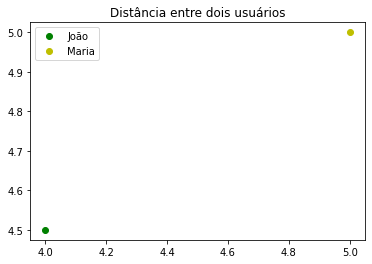

In [ ]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(['João', 'Maria'])
plt.title('Distância entre dois usuários')

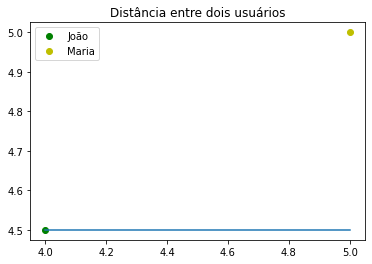

In [ ]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(['João', 'Maria'])
plt.title('Distância entre dois usuários')
plt.plot([4, 5], [4.5, 4.5], linestyle = '-')

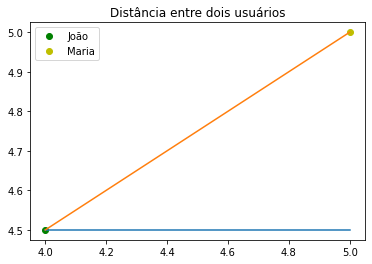

In [ ]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(['João', 'Maria'])
plt.title('Distância entre dois usuários')
plt.plot([4, 5], [4.5, 4.5], linestyle = '-')
plt.plot([4, 5], [4.5, 5], linestyle = '-')

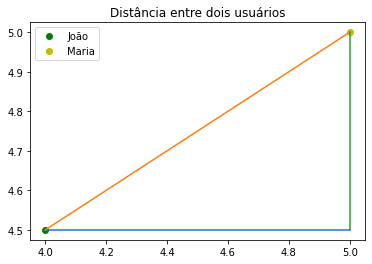

In [ ]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(['João', 'Maria'])
plt.title('Distância entre dois usuários')
plt.plot([4, 5], [4.5, 4.5], linestyle = '-')
plt.plot([4, 5], [4.5, 5], linestyle = '-')
plt.plot([5, 5], [4.5, 5], linestyle = '-')

In [ ]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])
joao - maria

array([-1. , -0.5])

In [ ]:
from math import sqrt
def pitagoras(a, b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y)
pitagoras(joao, maria)

1.118033988749895

In [ ]:
np.linalg.norm(joao - maria)

1.118033988749895

In [ ]:
def pitagoras(a, b):
    return np.linalg.norm(a - b)
pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Distância entre dois usuários')

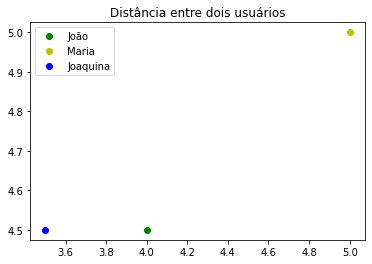

In [ ]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Distância entre dois usuários')

In [ ]:
joaquina = np.array([3.5, 4.5])
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [ ]:
notas_do_usuario = notas.query('usuarioid == 1')
notas_do_usuario = notas_do_usuario[['filmeid', 'nota']].set_index('filmeid')
notas_do_usuario

,nota
filmeid,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5
1590,2.5
1591,1.5
2134,4.5
2478,4.0


In [ ]:
notas_do_usuario.loc[3424]

nota    4.5
Name: 3424, dtype: float64

In [ ]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query('usuarioid == %d' % usuario)
    notas_do_usuario = notas_do_usuario[['filmeid', 'nota']].set_index('filmeid')
    return notas_do_usuario

In [ ]:
notas_do_usuario(1)

,nota
filmeid,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5
1590,2.5
1591,1.5
2134,4.5
2478,4.0


In [ ]:
notas_do_usuario(4)

,nota
filmeid,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0
...,...
53972,3.5
53996,4.5
54286,5.0


In [ ]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [ ]:
usuario1.head()

,nota
filmeid,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5


In [ ]:
usuario4.head()

,nota
filmeid,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0


In [ ]:
usuario1.join(usuario4, lsuffix ='_esquerda', rsuffix = '_direita')

,nota_esquerda,nota_direita
filmeid,,
307,3.5,NaN
481,3.5,4.0
1091,1.5,1.0
1257,4.5,NaN
1449,4.5,NaN
1590,2.5,3.5
1591,1.5,3.5
2134,4.5,NaN
2478,4.0,3.0


In [ ]:
usuario1.join(usuario4, lsuffix ='_esquerda', rsuffix = '_direita').dropna()

,nota_esquerda,nota_direita
filmeid,,
481,3.5,4.0
1091,1.5,1.0
1590,2.5,3.5
1591,1.5,3.5
2478,4.0,3.0
2840,3.0,3.5
2986,2.5,1.5
3020,4.0,3.5
3698,3.5,4.0


In [ ]:
diferencas = usuario1.join(usuario4, lsuffix ='_esquerda', rsuffix = '_direita').dropna()

In [ ]:
def distancia_de_vetores(a, b):
    return np.linalg.norm(a - b)

In [ ]:
distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)

3.0413812651491097

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix ='_esquerda', rsuffix = '_direita').dropna()
    return distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)

In [ ]:
distancia_de_usuarios(1, 4)

3.0413812651491097

In [ ]:
notas.usuarioid

0            1
1            1
2            1
3            1
4            1
          ... 
207887    2061
207888    2061
207889    2061
207890    2061
207891    2061
Name: usuarioid, Length: 207892, dtype: int64

In [ ]:
notas.usuarioid.unique()

array([   1,    2,    3, ..., 2059, 2060, 2061])

In [ ]:
len(notas.usuarioid.unique())

2061

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix ='_esquerda', rsuffix = '_direita').dropna()
    distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
    return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_usuarios(1, 4)

[1, 4, 3.0413812651491097]

In [ ]:
voce_id = 1
distancias = []
for usuario_id in notas.usuarioid.unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
distancias[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [ ]:
def distancia_de_todos(voce_id):
    distancias = []
    for usuario_id in notas.usuarioid.unique():
        informacoes = distancia_de_usuarios(voce_id, usuario_id)
        distancias.append(informacoes)
    return distancias
distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [ ]:
# Outra maneira de fazer o mesmo código
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas.usuarioid.unique()
    distancias = [distancia_de_usuarios(voce_id, usuario_id)for usuario_id in todos_os_usuarios]
    return distancias
distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [ ]:
def distancia_de_todos(voce_id):
    todos_os_usuarios = notas.usuarioid.unique()
    distancias = [distancia_de_usuarios(voce_id, usuario_id)for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias
distancia_de_todos(1)#como agora é dataframe não precisa do '[:5]'

,voce,outra_pessoa,distancia
0,1,1,0.00
1,1,2,0.00
2,1,3,0.00
3,1,4,3.04
4,1,5,0.00
...,...,...,...
2056,1,2057,0.00
2057,1,2058,0.00
2058,1,2059,0.00
2059,1,2060,1.00


In [ ]:
distancia_de_todos(1).query('distancia == 0')

,voce,outra_pessoa,distancia
0,1,1,0.0
1,1,2,0.0
2,1,3,0.0
4,1,5,0.0
6,1,7,0.0
...,...,...,...
2055,1,2056,0.0
2056,1,2057,0.0
2057,1,2058,0.0
2058,1,2059,0.0


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix ='_esquerda', rsuffix = '_direita').dropna()
    
    if (len(diferencas) < minimo):
        return [usuario_id1, usuario_id2, 100000 ]
    
    distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
    return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.00
1,1,2,100000.00
2,1,3,100000.00
3,1,4,3.04
4,1,5,100000.00


In [ ]:
def mais_proximo_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values('distancia')
    return distancias

In [ ]:
mais_proximo_de(1)

,voce,outra_pessoa,distancia
0,1,1,0.00
592,1,593,1.12
213,1,214,1.12
589,1,590,1.32
1179,1,1180,1.41
...,...,...,...
689,1,690,100000.00
688,1,689,100000.00
687,1,688,100000.00
700,1,701,100000.00


In [ ]:
def mais_proximo_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [ ]:
mais_proximo_de(1)

,voce,distancia
outra_pessoa,,
593,1,1.12
214,1,1.12
590,1,1.32
1180,1,1.41
235,1,1.73
...,...,...
690,1,100000.00
689,1,100000.00
688,1,100000.00


In [ ]:
def mais_proximo_de(voce_id, n = None):
    distancias = distancia_de_todos(voce_id, n = n)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [ ]:
def distancia_de_todos(voce_id, n = None):
    todos_os_usuarios = notas.usuarioid.unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, usuario_id)for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [ ]:
mais_proximo_de(1, n = 50)

,voce,distancia
outra_pessoa,,
4,1,3.04
26,1,3.64
48,1,100000.00
28,1,100000.00
29,1,100000.00
30,1,100000.00
31,1,100000.00
32,1,100000.00
33,1,100000.00


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix ='_esquerda', rsuffix = '_direita').dropna()
    
    if (len(diferencas) < minimo):
        return None
    
    distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
    return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, n = None):
    todos_os_usuarios = notas.usuarioid.unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, usuario_id)for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [ ]:
mais_proximo_de(1, n = 50)

,voce,distancia
outra_pessoa,,
4,1,3.04
26,1,3.64


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix ='_esquerda', rsuffix = '_direita').dropna()
    
    if (len(diferencas) < minimo):
        return None
    
    distancia = distancia_de_vetores(diferencas.nota_esquerda, diferencas.nota_direita)
    return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas.usuarioid.unique()
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_de_usuarios(voce_id, usuario_id)for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [ ]:
def mais_proximo_de(voce_id, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [ ]:
mais_proximo_de(1, numero_de_usuarios_a_analisar = 50)

,voce,distancia
outra_pessoa,,
4,1,3.04
26,1,3.64


In [ ]:
voce = 1
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
similares = mais_proximo_de(voce, numero_de_usuarios_a_analisar = 50)
similar = similares.iloc[0].name
notas_do_similar = notas_do_usuario(similar)
notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
notas_do_similar

,nota
filmeid,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0
...,...
53972,3.5
53996,4.5
54286,5.0


In [ ]:
notas_do_similar.sort_values('nota', ascending = False)

,nota
filmeid,
2193,5.0
27773,5.0
349,5.0
8132,5.0
8360,5.0
...,...
1732,0.5
1220,0.5
3268,0.5


In [ ]:
def sugere_para(voce):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = mais_proximo_de(voce, numero_de_usuarios_a_analisar = 50)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
    recomendacoes = notas_do_similar.sort_values('nota', ascending = False)
    return recomendacoes.join(filmes)

In [ ]:
sugere_para(1)

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
2193,5.0,Willow (1988),Action|Adventure|Fantasy,90.0,3.36
27773,5.0,Old Boy (2003),Mystery|Thriller,91.0,4.20
349,5.0,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,255.0,3.62
8132,5.0,Gladiator (1992),Action|Drama,27.0,4.15
8360,5.0,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,158.0,3.53
...,...,...,...,...,...
1732,0.5,"Big Lebowski, The (1998)",Comedy|Crime,224.0,3.90
1220,0.5,"Blues Brothers, The (1980)",Action|Comedy|Musical,178.0,3.84
3268,0.5,Stop! Or My Mom Will Shoot (1992),Action|Comedy,11.0,1.77


In [ ]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = mais_proximo_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')
    recomendacoes = notas_do_similar.sort_values('nota', ascending = False)
    return recomendacoes.join(filmes)

In [ ]:
sugere_para(1, numero_de_usuarios_a_analisar = 50)

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
2193,5.0,Willow (1988),Action|Adventure|Fantasy,90.0,3.36
27773,5.0,Old Boy (2003),Mystery|Thriller,91.0,4.20
349,5.0,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,255.0,3.62
8132,5.0,Gladiator (1992),Action|Drama,27.0,4.15
8360,5.0,Shrek 2 (2004),Adventure|Animation|Children|Comedy|Musical|Ro...,158.0,3.53
...,...,...,...,...,...
1732,0.5,"Big Lebowski, The (1998)",Comedy|Crime,224.0,3.90
1220,0.5,"Blues Brothers, The (1980)",Action|Comedy|Musical,178.0,3.84
3268,0.5,Stop! Or My Mom Will Shoot (1992),Action|Comedy,11.0,1.77


In [ ]:
sugere_para(1)

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
1259,5.0,Stand by Me (1986),Adventure|Drama,185.0,3.96
1245,5.0,Miller's Crossing (1990),Crime|Drama|Film-Noir|Thriller,44.0,3.95
1247,5.0,"Graduate, The (1967)",Comedy|Drama|Romance,164.0,4.05
180,5.0,Mallrats (1995),Comedy|Romance,75.0,3.56
3235,5.0,Where the Buffalo Roam (1980),Comedy,7.0,3.36
...,...,...,...,...,...
3208,1.0,Loaded Weapon 1 (National Lampoon's Loaded Wea...,Action|Comedy,16.0,2.75
585,1.0,"Brady Bunch Movie, The (1995)",Comedy,90.0,2.67
2247,1.0,Married to the Mob (1988),Comedy,19.0,2.74


In [ ]:
def mais_proximo_de(voce_id, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias.head(n_mais_proximos)

In [ ]:
mais_proximo_de(1, numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
214,1,1.12
235,1,1.73
4,1,3.04
26,1,3.64
56,1,4.97
239,1,5.17
134,1,5.32


In [ ]:
mais_proximo_de(1, n_mais_proximos=2, numero_de_usuarios_a_analisar=300)

,voce,distancia
outra_pessoa,,
214,1,1.12
235,1,1.73


In [ ]:
voce = 1
n_mais_proximos = 10
numero_de_usuarios_a_analisar = 50
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, 
                             numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
similares

,voce,distancia
outra_pessoa,,
4,1,3.04
26,1,3.64


In [ ]:
voce = 1
n_mais_proximos = 10
numero_de_usuarios_a_analisar = 50
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, 
                             numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
usuarios_similares = similares.index

In [ ]:
voce = 1
n_mais_proximos = 10
numero_de_usuarios_a_analisar = 50
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, 
                             numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
usuarios_similares = similares.index
notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
notas_dos_similares.groupby('filmeid').mean()['nota']


filmeid
1        4.0
2        4.0
5        2.0
6        4.5
10       4.0
        ... 
54259    5.0
54286    5.0
55765    4.5
56367    4.5
58347    3.0
Name: nota, Length: 770, dtype: float64

In [ ]:
voce = 1
n_mais_proximos = 10
numero_de_usuarios_a_analisar = 50
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, 
                             numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
usuarios_similares = similares.index
notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
notas_dos_similares.groupby('filmeid').mean()[['nota']]


,nota
filmeid,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0
...,...
54259,5.0
54286,5.0
55765,4.5


In [ ]:
voce = 1
n_mais_proximos = 10
numero_de_usuarios_a_analisar = 50
notas_de_voce = notas_do_usuario(voce)
filmes_que_voce_ja_viu = notas_de_voce.index
similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, 
                             numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
usuarios_similares = similares.index
notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
recomendacoes = notas_dos_similares.groupby('filmeid').mean()[['nota']]
recomendacoes = recomendacoes.sort_values('nota', ascending = False)
recomendacoes.join(filmes).head()


,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
1625,5.0,"Game, The (1997)",Drama|Mystery|Thriller,171.0,3.90
1748,5.0,Dark City (1998),Adventure|Film-Noir|Sci-Fi|Thriller,104.0,3.85
4262,5.0,Scarface (1983),Action|Crime|Drama,121.0,3.91
1242,5.0,Glory (1989),Drama|War,98.0,3.89
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,684.0,4.17


In [ ]:
def sugere_pra(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = mais_proximo_de(voce, n_mais_proximos = n_mais_proximos, 
                                 numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmeid').mean()[['nota']]
    recomendacoes = recomendacoes.sort_values('nota', ascending = False)
    return recomendacoes.join(filmes)


In [ ]:
sugere_pra(1, numero_de_usuarios_a_analisar=50).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
1625,5.0,"Game, The (1997)",Drama|Mystery|Thriller,171.0,3.90
1748,5.0,Dark City (1998),Adventure|Film-Noir|Sci-Fi|Thriller,104.0,3.85
4262,5.0,Scarface (1983),Action|Crime|Drama,121.0,3.91
1242,5.0,Glory (1989),Drama|War,98.0,3.89
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,684.0,4.17


In [ ]:
sugere_pra(1, numero_de_usuarios_a_analisar=300).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
1939,5.0,"Best Years of Our Lives, The (1946)",Drama|War,17.0,3.97
1019,5.0,"20,000 Leagues Under the Sea (1954)",Adventure|Drama|Sci-Fi,49.0,3.47
1272,5.0,Patton (1970),Drama|War,72.0,3.76
3125,5.0,"End of the Affair, The (1999)",Drama,8.0,4.31
2660,5.0,"Thing from Another World, The (1951)",Horror|Sci-Fi,12.0,3.62


In [ ]:
sugere_pra(1)

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
44397,5.0,"Hills Have Eyes, The (2006)",Drama|Horror|Thriller,13.0,2.85
6291,5.0,Lilya 4-Ever (Lilja 4-ever) (2002),Crime|Drama,10.0,4.05
32943,5.0,Life Is Sweet (1990),Comedy|Drama,4.0,3.62
6528,5.0,Start the Revolution Without Me (1970),Comedy,1.0,5.00
4429,5.0,Moby Dick (1956),Drama,4.0,4.00
...,...,...,...,...,...
46322,0.5,Jet Li's Fearless (Huo Yuan Jia) (2006),Action|Drama,11.0,3.77
5691,0.5,Jason Goes to Hell: The Final Friday (1993),Action|Horror,3.0,0.83
99813,0.5,"Batman: The Dark Knight Returns, Part 2 (2013)",Action|Animation,6.0,2.92


In [ ]:
def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias.head(k_mais_proximos)

In [ ]:
def sugere_pra(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = knn(voce, k_mais_proximos = k_mais_proximos, 
                                 numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmeid').mean()[['nota']]
    recomendacoes = recomendacoes.sort_values('nota', ascending = False)
    return recomendacoes.join(filmes)


In [ ]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,titulo,genero,total_de_votos,nota_media
filmeid,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,81.0,3.58
1246,Dead Poets Society (1989),Drama,204.0,3.87
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,111.0,3.74
2329,American History X (1998),Crime|Drama,258.0,4.10
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,210.0,4.08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,496.0,3.88
7,Sabrina (1995),Comedy|Romance,115.0,3.08
2,Jumanji (1995),Adventure|Children|Fantasy,197.0,3.14
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,485.0,4.10


In [ ]:
notas['usuarioid'].max()+1

2062

In [ ]:
def novo_usuario(dados):
    novo_usuario = notas['usuarioid'].max()+1
    notas_do_usuario_novo = pd.DataFrame(dados, columns = ['filmeid', 'nota'])
    notas_do_usuario_novo['usuarioid'] = novo_usuario
    return pd.concat([notas, notas_do_usuario_novo])

In [ ]:
novo_usuario([[122904, 2], [1246, 5], 
              [2529, 2], [2329, 5], 
              [2324, 5], [1, 2], 
              [7, 0.5], [2, 2], 
              [1196, 1], [260, 1]])

,usuarioid,filmeid,nota,momento
0,1,307,3.5,1.26e+09
1,1,481,3.5,1.26e+09
2,1,1091,1.5,1.26e+09
3,1,1257,4.5,1.26e+09
4,1,1449,4.5,1.26e+09
...,...,...,...,...
5,2062,1,2.0,NaN
6,2062,7,0.5,NaN
7,2062,2,2.0,NaN
8,2062,1196,1.0,NaN


In [ ]:
notas = novo_usuario([[122904, 2], [1246, 5], 
              [2529, 2], [2329, 5], 
              [2324, 5], [1, 2], 
              [7, 0.5], [2, 2], 
              [1196, 1], [260, 1]])
notas.tail()

,usuarioid,filmeid,nota,momento
5,2062,1,2.0,NaN
6,2062,7,0.5,NaN
7,2062,2,2.0,NaN
8,2062,1196,1.0,NaN
9,2062,260,1.0,NaN


In [ ]:
sugere_pra(611).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
8800,5.0,Code 46 (2003),Romance|Sci-Fi,8.0,3.25
96606,5.0,Samsara (2011),Documentary,13.0,4.50
92475,5.0,All Watched Over by Machines of Loving Grace (...,Documentary,3.0,4.50
92535,5.0,Louis C.K.: Live at the Beacon Theater (2011),Comedy,14.0,4.21
2068,5.0,Fanny and Alexander (Fanny och Alexander) (1982),Drama|Fantasy|Mystery,18.0,3.86


In [ ]:
filmes_com_mais_de_50_votos.index

Int64Index([     1,      2,      3,      5,      6,      7,     10,     11,
                14,     16,
            ...
            116797, 119145, 122882, 122886, 122904, 134130, 134853, 148626,
            152081, 164179],
           dtype='int64', name='filmeid', length=1052)

In [ ]:
notas = notas.set_index('filmeid').loc[filmes_com_mais_de_50_votos.index]
notas.head()

,usuarioid,nota,momento
filmeid,,,
1,4,4.0,1.11e+09
1,10,5.0,9.49e+08
1,14,4.5,1.44e+09
1,15,4.0,1.37e+09
1,22,4.0,1.24e+09


In [ ]:
notas = notas.reset_index()
notas.head()

,filmeid,usuarioid,nota,momento
0,1,4,4.0,1.11e+09
1,1,10,5.0,9.49e+08
2,1,14,4.5,1.44e+09
3,1,15,4.0,1.37e+09
4,1,22,4.0,1.24e+09


In [ ]:
sugere_pra(611).head()

,nota,titulo,genero,total_de_votos,nota_media
filmeid,,,,,
265,5.0,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,93.0,3.90
112552,5.0,Whiplash (2014),Drama,70.0,4.21
1244,5.0,Manhattan (1979),Comedy|Drama|Romance,77.0,4.06
1653,5.0,Gattaca (1997),Drama|Sci-Fi|Thriller,198.0,3.66
2371,5.0,Fletch (1985),Comedy|Crime|Mystery,69.0,3.56


In [ ]:
def sugere_pra(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = knn(voce, k_mais_proximos = k_mais_proximos, 
                                 numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmeid').mean()[['nota']]
    aparicoes = notas_dos_similares.groupby('filmeid').count()['nota']
    return aparicoes
    
   # recomendacoes = recomendacoes.sort_values('nota', ascending = False)
   # return recomendacoes.join(filmes)


In [ ]:
def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors = 'ignore')
    return distancias.head(k_mais_proximos)

In [ ]:
sugere_pra(1, numero_de_usuarios_a_analisar=500)

filmeid
1         9
2         9
3         2
5         2
6         7
         ..
122886    1
122904    1
134130    1
134853    1
152081    1
Name: nota, Length: 1036, dtype: int64

In [ ]:
def sugere_pra(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = knn(voce, k_mais_proximos = k_mais_proximos, 
                                 numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmeid').mean()[['nota']]
    aparicoes = notas_dos_similares.groupby('filmeid').count()[['nota']]
    return recomendacoes.join(aparicoes, lsuffix = '_media_dos_usuarios', rsuffix = '_media_dos_usuarios')
    
   # recomendacoes = recomendacoes.sort_values('nota', ascending = False)
   # return recomendacoes.join(filmes)


In [ ]:
sugere_pra(1, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_media_dos_usuarios
filmeid,,
1,3.61,9
2,2.89,9
3,3.25,2
5,2.25,2
6,3.71,7
...,...,...
122886,2.50,1
122904,5.00,1
134130,4.00,1


In [ ]:
def sugere_pra(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index
    similares = knn(voce, k_mais_proximos = k_mais_proximos, 
                                 numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index('usuarioid').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby('filmeid').mean()[['nota']]
    aparicoes = notas_dos_similares.groupby('filmeid').count()[['nota']]
    filtro_minimo = k_mais_proximos / 2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix = '_media_dos_usuarios', rsuffix = '_aparicoes_nos_usuarios')
    recomendacoes.query('nota_aparicoes_nos_usuarios >= %.2f' % filtro_minimo)
    recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending = False)
    recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
    return recomendacoes.join(filmes)


In [ ]:
def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors = 'ignore')
    return distancias.head(k_mais_proximos)

In [ ]:
sugere_pra(1, numero_de_usuarios_a_analisar=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,genero,total_de_votos,nota_media
filmeid,,,,,,
1175,5.00,1,Delicatessen (1991),Comedy|Drama|Romance,59.0,3.83
89745,5.00,1,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,111.0,3.74
58,5.00,1,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,99.0,3.83
122904,5.00,1,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,81.0,3.58
1235,5.00,1,Harold and Maude (1971),Comedy|Drama|Romance,76.0,3.88
...,...,...,...,...,...,...
355,1.43,7,"Flintstones, The (1994)",Children|Comedy|Fantasy,85.0,2.34
1499,1.12,4,Anaconda (1997),Action|Adventure|Thriller,53.0,2.10
1103,1.00,1,Rebel Without a Cause (1955),Drama,50.0,3.71


In [ ]:
sugere_pra(611).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,genero,total_de_votos,nota_media
filmeid,,,,,,
265,5.0,1,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,93.0,3.90
112552,5.0,1,Whiplash (2014),Drama,70.0,4.21
1244,5.0,1,Manhattan (1979),Comedy|Drama|Romance,77.0,4.06
1653,5.0,1,Gattaca (1997),Drama|Sci-Fi|Thriller,198.0,3.66
2371,5.0,1,Fletch (1985),Comedy|Crime|Mystery,69.0,3.56
193,5.0,1,Showgirls (1995),Drama,74.0,2.02
515,5.0,1,"Remains of the Day, The (1993)",Drama|Romance,82.0,3.93
741,5.0,1,Ghost in the Shell (Kôkaku kidôtai) (1995),Animation|Sci-Fi,66.0,4.13
4641,5.0,2,Ghost World (2001),Comedy|Drama,54.0,3.96


In [ ]:
sugere_pra(611, k_mais_proximos=20).head(10)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,genero,total_de_votos,nota_media
filmeid,,,,,,
2371,5.00,1,Fletch (1985),Comedy|Crime|Mystery,69.0,3.56
333,5.00,1,Tommy Boy (1995),Comedy,105.0,3.40
122882,5.00,1,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,106.0,3.80
800,5.00,2,Lone Star (1996),Drama|Mystery|Western,53.0,4.12
2700,5.00,1,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical,155.0,3.44
1029,5.00,1,Dumbo (1941),Animation|Children|Drama|Musical,72.0,3.40
193,5.00,1,Showgirls (1995),Drama,74.0,2.02
2795,5.00,1,National Lampoon's Vacation (1983),Comedy,56.0,3.92
112552,5.00,2,Whiplash (2014),Drama,70.0,4.21
